# Transformada de Fourier y sus aplicaciones

La transformada de Fourier aparece en infinidad de aplicaciones y desarrollos matemáticos. Vamos a ver en este notebook qué es y cómo se puede calcular con Python.

## Descomposición de una función periódica en sus frecuencias

Estamos acostumbrados a tratar con funciones sinusoidales del tipo,

$$f(t) = A \sin(\omega t)$$

ó

$$f(t) = A \cos(\omega t)$$

Por ejemplo, al estudiar el movimiento de un péndulo o de un muelle, o también cuando analizamos las ondas armónicas. Podemos ver qué significan los parámetros $A$ y $\omega$ dibujando una de estas funciones, 

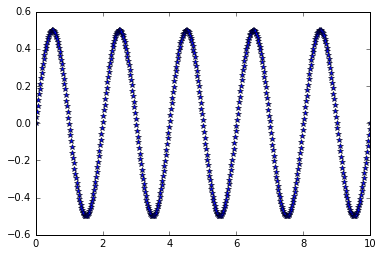

In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

A = 0.5
omega = 2.0*np.pi*0.5
t = np.linspace(0,10,500)
x = A*np.sin(omega*t)
plt.plot(t,x,'*')

Cambiando los parámetros A y omega en el anterior código vemos que el primero indica el máximo y mínimo valor que puede tomar la función (la amplitud) mientras que el segundo modifica el número de oscilaciones en el intervalo dibujado (la frecuencia angular, la cual está relacionada con el periodo de la función por $\omega = 2 \pi /T$)

Pero, **¿por qué se le da tanta importancia a estas funciones?**

Uno de los motivos es que **cualquier función periódica (que puede representar una señal, una onda o también una imagen en 2D) se puede descomponer en una suma de funciones sinusoidales con diferente frecuencia y amplitud**

$$f(t) = A_0 + \sum_n \left( A_n \sin(n \omega t) + B_n \cos(n \omega t) \right)$$

A esta descomposición se le denomina *serie de Fourier*.

Veamos esto con un ejemplo. Primero dibujamos una señal cuadrada periódica. Esto se consigue con la función *square* del submódulo Signal de Scipy (dedicado a análisis de señales).

(-1.1, 1.1)

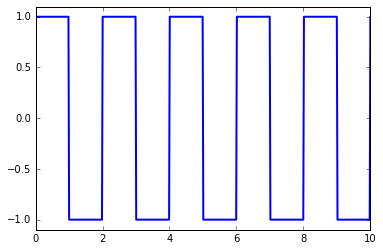

In [2]:
from scipy.signal import square
t = np.linspace(0,10,500)
y = square(omega*t,0.5)
plt.plot(t,y,lw=2)
plt.ylim(-1.1,1.1)

Esta funcion es una función periódica que cuya descomposición en senos y cosenos es de la siguiente forma,

$$f(t) = \frac{4}{\pi}\sum_{n=1,3,5,\ldots} \frac{1}{n} \sin(n \omega t)$$

Es decir, 

$$f(t) = \frac{4}{\pi} \left( \sin(\omega t) + \frac{1}{3} \sin(3\omega t) + \frac{1}{5} \sin(5 \omega t) + \ldots\right)$$

Vamos a ver cómo se va reconstruyendo la función cuadrada a medida que añadimos nuevos términos, 

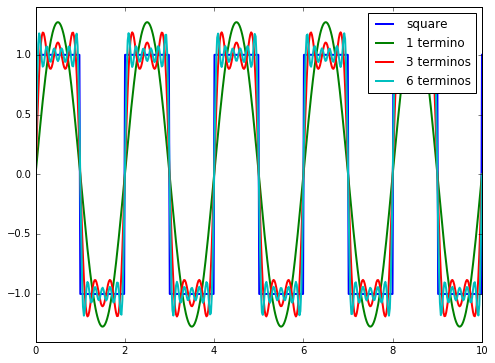

In [3]:
# escribimos seis términos
term1 =  np.sin(omega*t)
term2 =  (1.0/3)*np.sin(3*omega*t)
term3 =  (1.0/5)*np.sin(5*omega*t)
term4 =  (1.0/7)*np.sin(7*omega*t)
term5 =  (1.0/9)*np.sin(9*omega*t)
term6 =  (1.0/11)*np.sin(11*omega*t)

serie_fourier1 = (4/np.pi)*term1
serie_fourier2 = (4/np.pi)*(term1 + term2 + term3)
serie_fourier3 = (4/np.pi)*(term1 + term2 + term3 + term4 + term5 + term6)

plt.figure(figsize=(8,6))
plt.plot(t,y,t,serie_fourier1,t,serie_fourier2,t,serie_fourier3,lw=2)
plt.legend(('square','1 termino','3 terminos', '6 terminos'))
plt.ylim(-1.4,1.4);

Vemos cómo a medida que incluimos más términos la serie de Fourier se aproxima más y más a la señal cuadrada. En este caso para obtener exactamente la función cuadrada, tendríamos que usar infinitos términos. 

Sin embargo, el hecho de poder descomponer **cualquier** función periódica en una suma de funciones sinusoidales, en general más sencillas hace que si sabemos tratar estas funciones, sabemos qué le ocurre a nuestro sistema para cualquier función periódica, no importa cómo sea.


Para saber cómo calcular los coeficientes de la serie de Fourier, se puede consultar [por ejemplo, esta página](http://mathworld.wolfram.com/FourierSeries.html)

#### Ejercicio

(a) Genera una función `funsquare` que tenga como argumentos $t$, $\omega$ y $n$, donde $n$ es el número de términos que queremos incluir en la serie de Fourier de la función cuadrada. La función ha de devolver la serie de Fourier con $n$ términos de la función cuadrada anterior.

Nota: Utiliza un bucle `for` que recorra los números impares de 1 hasta n y almacena en una variable la suma.

(b) Dibuja en una gráfica la función cuadrada con $\omega = 0.2$ frente a un vector `tiempo` de 1000 puntos entre 0 y 100 junto al resultado de aplicar la función calculada en el apartado (a) `funsquare` para $n = 10$ y el mismo $\omega$.

## Transformada de Fourier

Hasta ahora hemos visto cómo podemos descomponer funciones *periódicas* en una suma de senos y cosenos. Pero, **¿qué ocurre si tenemos una función no periódica?**

En este caso, no podemos realizar una descomposición en una suma *discreta* de frecuencias, pero sí en una suma *continua*, es decir usando una integral. 

$$f(t) = \int_{-\infty}^{\infty} F(\omega) e^{i \omega t} d\omega$$

La función $F(\omega)$ se conoce como **transformada de Fourier** de la función $f(t)$ y se calcula de la siguiente forma, 

$$F(\omega) = \frac{1}{2 \pi} \int_{-\infty}^{\infty} f(t) e^{- i \omega t} dt$$

La transformada de Fourier es una función **compleja**, de la cual podemos calcular su módulo $|F(\omega)|$ y su fase $\Phi(\omega)$, ambas a su vez funciones de la frecuencia $\omega$. A la expresión para $f(t)$ anterior se le conoce como **transformada inversa de Fourier**.

Aunque el hecho de tener una integral y la función exponencial compleja $e^{i \omega t}$ puede hacer parecer la expresión más compleja que en el caso de funciones periódicas, el fondo no cambia. La transformada de Fourier supone una descomposición en sinusoides de una función $f(t)$. Para verlo, hay que tener en cuenta que, 

$$e^{i \omega t} = \cos(\omega t) + i \sin(\omega t)$$

El módulo de $F(\omega)$ juega el papel de la amplitud de cada término en la serie de Fourier, mientras que su fase $\Phi(\omega)$ es una fase inicial que se le añade a cada coseno y seno de la descomposición.

Otra forma de escribir la transformada de Fourier es utilizando la frecuencia $\nu = \omega / 2 \pi$, 

$$f(t) = \frac{1}{2 \pi} \int_{-\infty}^{\infty} F(\nu) e^{i 2 \pi \nu t} d\nu$$

$$F(\nu) =  \int_{-\infty}^{\infty} f(t) e^{- i 2 \pi \nu t} dt$$

------------

Podríamos realizar una analogía entre la transformada de Fourier y un prisma en Óptica. Al igual que el prisma separa las componentes en frecuencia (colores) de la luz incidente, la transformada de Fourier también permite visualizar qué frecuencias y con qué amplitud participan en una cierta función.

----------------


Algunas materias dentro de la Óptica en las que la transformada de Fourier tiene una importancia capital son, 

* [Difracción de Fraunhofer](http://147.96.88.158/notebooks/DifraccionFraunhofer.ipynb): La difracción es un fenómeno ondulatorio. La onda se aleja de una trayectoria rectilínea al pasar por una abertura u obstáculo. Cuando medimos el campo eléctrico de la luz o la irradiancia en un punto P muy alejado de la abertura, decimos que estamos en régimen de Fraunhofer. Para este régimen el campo en P es la transformada de Fourier del campo en la abertura.

* Teoría difraccional de la imagen. La respuesta de un sistema óptico a las distintas frecuencias espaciales la da la *Función de Transferencia Óptica* ([(OTF)](http://en.wikipedia.org/wiki/Optical_transfer_function), la cual es la transformada de Fourier de la imagen que da el sistema de un punto objeto. El módulo de la OTF se llama MTF y nos da cómo varía el constraste de la imagen para cada frecuencia espacial.

* [Procesado de imágenes](http://es.wikipedia.org/wiki/Procesamiento_digital_de_im%C3%A1genes). El procesado (filtros, por ejemplo) de imágenes se realiza en muchas ocasiones primero sobre la transformada de Fourier (2D) de la imagen, para después realizar la transformada inversa y obtener la imagen procesada.

* Resolución de ecuaciones diferenciales. Ecuaciones diferenciales complejas pueden ser transformadas en ecuaciones algebraicas mediante la Transformada de Fourier.

* Índice de refracción. La respuesta de un medio a la luz varía en función de la frecuencia (color) de la radiación incidente. Para analizar cómo cambia el índice de refracción con el color se estudia el sistema en *el espacio de frecuencias*, es decir, con la transformada de Fourier de la onda incidente.



#### ¿Cómo se calcula en Python?

En primer lugar, hay que tener en cuenta que cuando utilizamos funciones en un programa de cálculo numérico, usamos una versión *discreta* de esa función. Es decir, manejamos vectores $t$ y $f(t)$, definidos en $N$ puntos $t_i$ separados por un cierto paso ht. Por tanto, $t \rightarrow t_i = i \times$ ht y $f(t) \rightarrow f(t_i)$, con $i = 1 \ldots N$.

Así, se define una *transformada de Fourier discreta* $F_k$, en donde la integral se trata como una suma, 

$$f_i = \sum_{i=0}^N F_k e^{2 \pi k i/N}$$

Vemos que $k$ juega el papel de la frecuencia $\nu$ en nuestras anteriores expresiones. **La Transformada de Fourier discreta permite obtener las frecuencias de las periodicidades más importantes en una cierta señal, función o imagen (en 2D)**. Aquellos valores de $k$ que den valores más altos de la función $|F_k|$, serán las frecuencias dominantes en la función $f(t)$.

Python dispone de la función `fft` (y `fft2` para 2D, es decir, imágenes) para calcular la transformada de Fourier discreta. Concretamente las siglas *FFT* significan *Fast Fourier Transform* donde la parte de *Fast* es debido al algoritmo que se utiliza. Estas funciones se encuentran repetidas en dos módulos distintos: Numpy y Scipy.fftpack. Nosotros utilizaremos este último módulo.

Veamos cómo se utiliza.

Si tenemos un vector `y` que representa una señal en función del tiempo `t` (que será otro vector), para calcular la transformada de Fourier seguiremos estos pasos:

1. Extraer el número de puntos N del vector `y` (por ejemplo con np.size(y)) y el paso ht temporal.

2. Calcular la transformada por medio de `fft(y)` (una vez importada la función fft del módulo scipy.fftpack).

3. Calcular el vector de frecuencias para poder representar la transformada de Fourier. Para ello utilizamos la función `fftfreq` del mismo módulo. Esta función pide como argumentos N y ht y devuelve las frecuencias a las que se corresponden los elementos de `fft(y)`

4. Representar la transformada. Normalmente se representa su módulo.

**Si ya sé la transformada de Fourier, puedo calcular la función $f(t)$ asociada a ella?**

Sí, esa operación es la que denominábamos antes transformada *inversa* de Fourier, y se calcula en Python mediante la función `ifft`.  

La combinación de `fft` y de `ifft` es muy útil cuando se aplican filtros en el dominio de frecuencias (por ejemplo, eliminar las frecuencias más altas de un archivo de audio, como se hace para generar el archivo mp3) y despueś se quiere observar la señal filtrada en el dominio temporal.

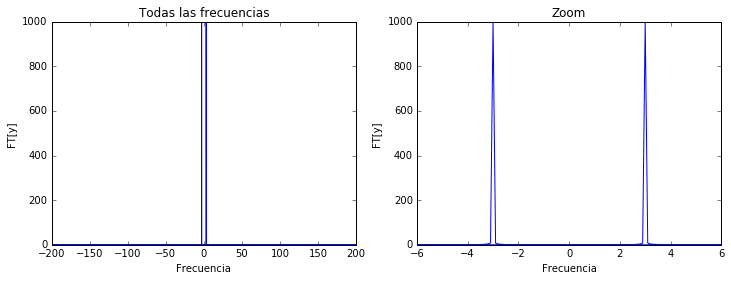

In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from scipy.fftpack import fft, fftfreq
# Generamos una señal, supongamos una función seno.
N = 4000 # Número de puntos de nuestra señal
t = np.linspace(0,10,N)
ht = t[1] - t[0] # Paso temporal
y = 0.5*np.sin(2.0*np.pi*3*t) # Frecuencia igual a 3
# Calculamos el vector que representa la transformada de Fourier.
FTy = fft(y)
#Calculamos el vector de frecuencias
frecuencias = fftfreq(N,ht)
plt.figure(figsize=(12,4))
plt.tight_layout
plt.subplot(121)
plt.plot(frecuencias,np.abs(FTy))
plt.xlabel('Frecuencia')
plt.ylabel('FT[y]')
plt.title('Todas las frecuencias')
plt.subplot(122)
plt.plot(frecuencias,np.abs(FTy))
plt.xlim(-6,6)
plt.xlabel('Frecuencia')
plt.ylabel('FT[y]')
plt.title('Zoom')

Vemos que el módulo de la Transformada Discreta de Fourier nos da dos picos iguales en frecuencias 3 y -3. Esto ocurre porque el seno se puede escribir en función de exponenciales complejas como, 

$$ \sin(a x) = \frac{e^{i a x} - e^{-i a x}}{2 i}$$

Como la parte de frecuencias negativas no nos da más información, nos podemos quedar en este caso (y en lo que respecta a funciones reales), con la parte de frecuencias positivas, identificando la frecuencia 3 como la única frecuencia que nuestra señal posee. **En general, para analizar las componentes en frecuencia de una señal nos fijaremos únicamente en la parte de frecuencias positivas**.

Veamos otro ejemplo. En esta ocasión la transformada nos da el patrón de difracción de Fraunhofer de una rendija.

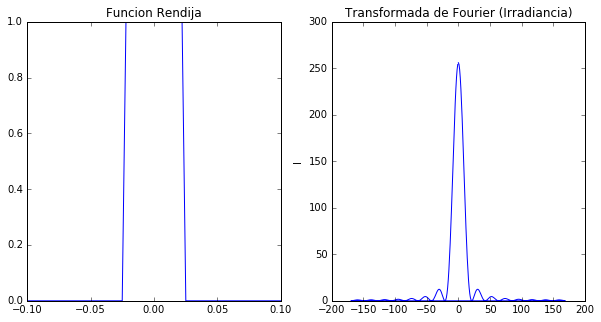

In [25]:
from scipy.fftpack import fft, fftfreq
# función rendija
def fun(x):
    if(abs(x)<0.05/2):
        return 1.0
    else:
        return 0.0
    
y = np.linspace(-0.5,0.5,340)
funvec = np.vectorize(fun)
campoinc = funvec(y)
freq = fftfreq(np.size(y),y[1]-y[0])
tfcampo = fft(campoinc)

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(y,campoinc)
plt.xlim(-0.1,0.1)
plt.title('Funcion Rendija')
plt.subplot(122)
plt.plot(freq,np.abs(fft(campoinc))**2)# Representamos el cuadrado porque la transformada de Fourier da el campo eléctrico.
plt.ylabel("I")
plt.title('Transformada de Fourier (Irradiancia)')

#### Ejercicio

Cargar el archivo de datos "mean_monthly_temp_Nottingham1920_1939" que representa la temperatura media mensual en Nottingham entre 1920 y 1939 (240 meses) y extraer las frecuencias más importantes de una serie temporal.

Comprobar que aparece una frecuencia anual en la variación de la temperatura.

#### Ejercicio

Definir una variable tiempo con 10000 puntos entre 0 y 10. A continuación definir una variable que sea al suma de tres senos con diferentes frecuencias $\nu_1 = 0.5$, $\nu_2 = 1$ y $\nu_3 = 1.5$ y amplitudes $A_1 = 1.5$, $A_2 = 2.0$, $A_3 = 0.5$. Calcular la transformada de Fourier discreta de esta variable, el vector de frecuencias y representar el módulo de la transformada para las frecuencias positivas. 

* Extraer de la gráfica las frecuencias de los senos utilizados.

* ¿Los valores mostrados en la gráfica de los picos correspondientes a cada frecuencia son las amplitudes de cada seno?

#### Ejercicio

En la variable que almacena la transformada de Fourier calculada en el ejercicio anterior, aplicar un filtro que consista en eliminar la contribución de las frecuencias mayores que 0.7. Para ello,

1. Seleccionar los índices de la variable frecuencias que se correspondan con valores absolutos de frecuencias (para eliminar también la parte de frecuencias negativas) mayores que este valor (Nota: ver la ayuda de la función `np.where`).

2. De la variable que almacena la transformada, hacer cero todos los elementos con esos índices.


A continuación calcular la transformada inversa (con `ifft`) y representar la función obtenida junto a la original.

### Máxima frecuencia resoluble y paso en frecuencias

Hemos visto que la función `fftfreq` nos proporciona un vector de frecuencias para poder representar la transformada de Fourier. Esta función depende del número de puntos $N$ del vector cuya transformada queremos calcular y del paso temporal (o espacial) que estamos usando.

¿Cómo afectan estos parámetros a la transformada de Fourier?. Veámoslo con un ejemplo, 

Modifica el parámetro `ht` del código siguiente y observa sus efectos tanto en la representación de la señal como en la figura de la transformada.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq

ht = 0.5 # Modifica este parámetro entre 0.1 y 1.0
t_max = 60 # Modifica este parámetro entre 50 y 200
t = np.arange(0,t_max,ht)
N = np.size(t)
y = np.sin(2.0*np.pi*0.5*t)*np.exp(-((t-20)/(2.0*1.5))**2)
tfy = fft(y)
frecuencias = fftfreq(N,ht)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(t,y)
plt.title('Funcion')
plt.subplot(122)
plt.plot(frecuencias,np.abs(tfy)*2/N,'+-')
plt.xlim(0,4)
plt.title('Transformada')


Modifica ahora el parámetro `t_max` y observa sus efectos en ambos casos.

-------------------

Se puede observar que el efecto de cambiar `t_max` es que cambia el espaciado entre frecuencias consecutivas, el paso en frecuencias. Cuanto mejor discretizada queramos tener la transformada de Fourier, mayor deberá ser `t_max` para que el paso en frecuencias sea menor.

En concreto, se tiene que $\Delta \nu = 1/t_{max}$


El efecto de cambiar el paso `ht` es cambiar la frecuencia máxima resoluble por la transformada de Fourier. Cuanto mayor sea el paso, menor será esta frecuencia máxima. Se puede ver por qué ocurre si observamos cómo se discretiza la función representada a la izquierda en la anterior figura al variar `ht`. Al aumentar el paso, llega un momento en que no discretizamos bien las oscilaciones de la función. O dicho de otro modo, perdemos información de las oscilaciones a esa frecuencia. Para discretizar bien una frecuencia de oscilación, el paso temporal ha de ser al menos la mitad que el periodo de la oscilación (disponer de dos puntos por periodo).

Se define una frecuencia máxima que la transformada de Fourier puede resolver denominándose **frecuencia de Nyquist**, 

$$f_N = \frac{1}{2 ht}$$

donde ht es el paso temporal o espacial.

A la frecuencia $1/ht$ se le denomina *frecuencia de muestreo* (sampling frequency)

#### Ejercicio

* Calcula qué paso temporal mínimo se debería tener para poder resolver una frecuencia de 540 kHz.

* Dibuja la transformada de Fourier de un seno con esa frecuencia (parte positiva del espectro) a diferentes pasos temporales en la misma figura. 